In [2]:
import copy
import csv
import logging
import sys
import time
import warnings

import importlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score

import pypsa
from n_dimensional_datasets import *
from plotter import *

from IPython.display import display # for better Pandas printing 

warnings.filterwarnings('ignore')
logger = logging.getLogger("pypsa")
logger.setLevel("WARNING")
%matplotlib inline

path_to_scigrid_example = "../../pypsa/examples/scigrid-de/"
path_to_scigrid_data = path_to_scigrid_example + "/scigrid-with-load-gen-trafos-modified/"
path_to_scigrid_results = path_to_scigrid_data + "results/"

sys.path.append(path_to_scigrid_example)
from scigrid_lopf_then_pf_modified import run

from change_scigrid_data import set_sample_size

In [3]:
sample_size = 32
if sample_size % 4 != 0:
    raise ValueError("LOPF calculated over 4 timestamps. Sample size must be divisible by 4")

In [4]:
# data handling

def personalise_column_names(df, name):
        new_columns = []
        for column in df.columns:
            new_columns.append(name +  "-" + str(column))
        df.columns = new_columns
        return df

def collect_data(data):
    data["loads"].append(personalise_column_names(pd.read_csv(path_to_scigrid_data + "loads-p_set.csv"), "load"))
    data["vmags"].append(personalise_column_names(pd.read_csv(path_to_scigrid_results + "vmags.csv"), "vmag"))
    data["vangs"].append(personalise_column_names(pd.read_csv(path_to_scigrid_results + "vangs.csv"), "vang"))
    data["qmags"].append(personalise_column_names(pd.read_csv(path_to_scigrid_results + "qmags.csv"), "qmag"))
    data["linemags"].append(personalise_column_names(pd.read_csv(path_to_scigrid_results + "linemags.csv"), "linemag"))

Importing PyPSA from older version of PyPSA than current version 0.14.1.
Please read the release notes at https://pypsa.org/doc/release_notes.html
carefully to prepare your network for import.



Performing linear OPF for one day, 4 snapshots at a time:
Solver log file: '/tmp/tmptd3jpb6w.cbc.log'
Solver solution file: '/tmp/tmp4cuowpyt.pyomo.soln'
Solver problem files: ('/tmp/tmp4cuowpyt.pyomo.lp',)
Solver log file: '/tmp/tmp0c_xu930.cbc.log'
Solver solution file: '/tmp/tmpne__u6fd.pyomo.soln'
Solver problem files: ('/tmp/tmpne__u6fd.pyomo.lp',)
Solver log file: '/tmp/tmplu588bmg.cbc.log'
Solver solution file: '/tmp/tmpirs_npjn.pyomo.soln'
Solver problem files: ('/tmp/tmpirs_npjn.pyomo.lp',)
Solver log file: '/tmp/tmpcmbjt2vy.cbc.log'
Solver solution file: '/tmp/tmpm4ibojvt.pyomo.soln'
Solver problem files: ('/tmp/tmpm4ibojvt.pyomo.lp',)
Solver log file: '/tmp/tmplgr07u33.cbc.log'
Solver solution file: '/tmp/tmpwbgcxy7y.pyomo.soln'
Solver problem files: ('/tmp/tmpwbgcxy7y.pyomo.lp',)
Solver log file: '/tmp/tmpwux0w7si.cbc.log'
Solver solution file: '/tmp/tmpct86a9c0.pyomo.soln'
Solver problem files: ('/tmp/tmpct86a9c0.pyomo.lp',)
Solver log file: '/tmp/tmp5xnhfmcz.cbc.log'
Solv

Importing PyPSA from older version of PyPSA than current version 0.14.1.
Please read the release notes at https://pypsa.org/doc/release_notes.html
carefully to prepare your network for import.



Performing linear OPF for one day, 4 snapshots at a time:
Solver log file: '/tmp/tmpt8qltpho.cbc.log'
Solver solution file: '/tmp/tmp8kuunenf.pyomo.soln'
Solver problem files: ('/tmp/tmp8kuunenf.pyomo.lp',)
Solver log file: '/tmp/tmp4p57ce4z.cbc.log'
Solver solution file: '/tmp/tmp367d_sag.pyomo.soln'
Solver problem files: ('/tmp/tmp367d_sag.pyomo.lp',)
Solver log file: '/tmp/tmp6jgg15en.cbc.log'
Solver solution file: '/tmp/tmpbo31dk1f.pyomo.soln'
Solver problem files: ('/tmp/tmpbo31dk1f.pyomo.lp',)
Solver log file: '/tmp/tmpsdcdqdne.cbc.log'
Solver solution file: '/tmp/tmprb0q7wcv.pyomo.soln'
Solver problem files: ('/tmp/tmprb0q7wcv.pyomo.lp',)
Solver log file: '/tmp/tmpnig1trng.cbc.log'
Solver solution file: '/tmp/tmp3namt6am.pyomo.soln'
Solver problem files: ('/tmp/tmp3namt6am.pyomo.lp',)
Solver log file: '/tmp/tmpr_u41sb3.cbc.log'
Solver solution file: '/tmp/tmpgk4ngew8.pyomo.soln'
Solver problem files: ('/tmp/tmpgk4ngew8.pyomo.lp',)
Solver log file: '/tmp/tmpytfanag1.cbc.log'
Solv

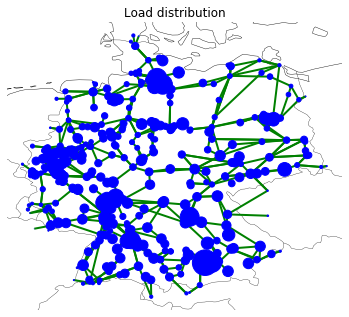

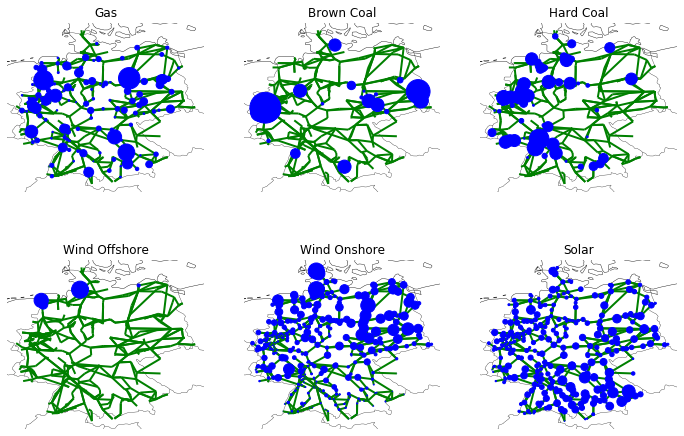

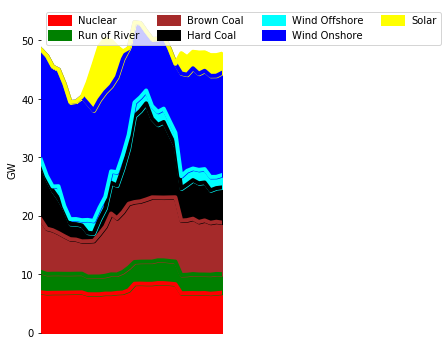

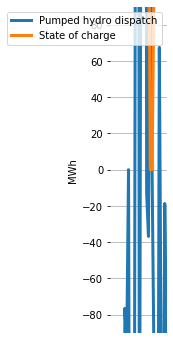

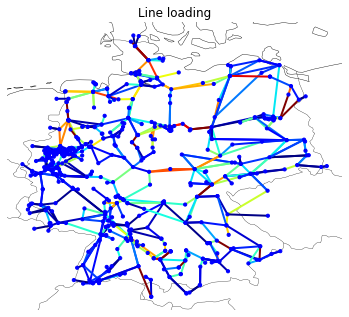

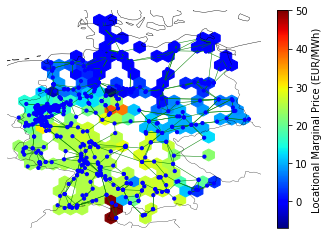

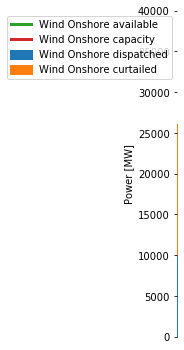

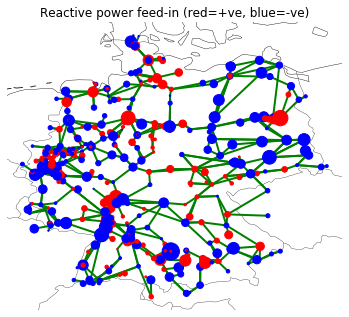

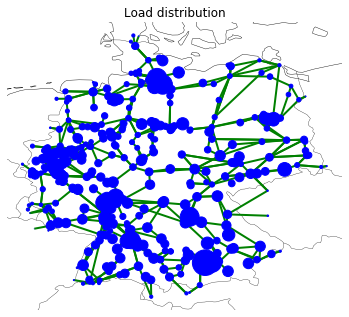

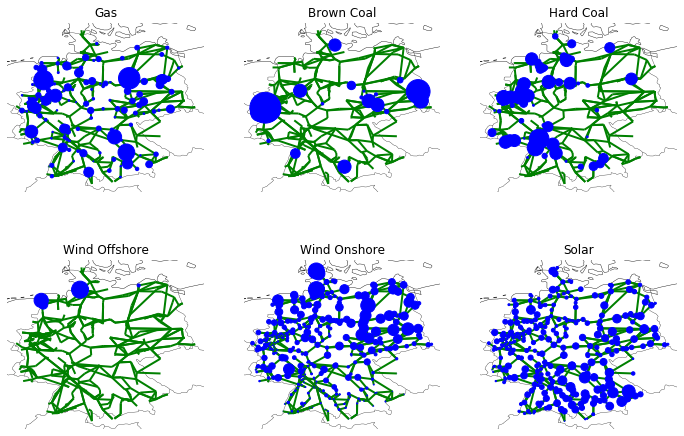

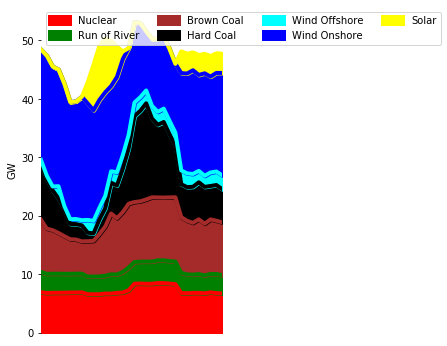

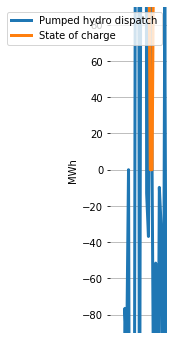

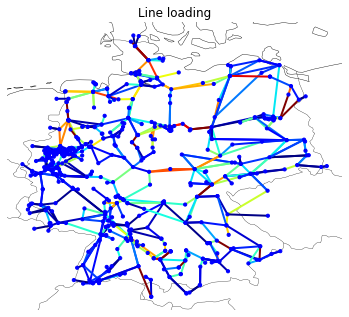

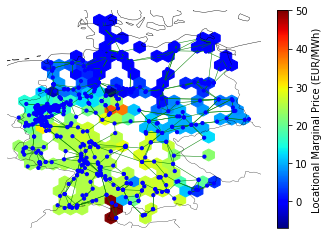

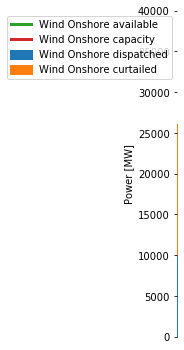

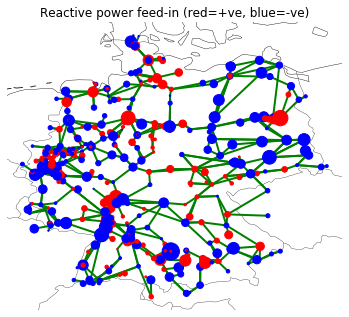

In [6]:
data = {"loads": [], "vmags": [], "vangs": [], "qmags": [], "linemags": [], "iter": []}


runs = 2
for i in range(runs):
    set_sample_size(path_to_scigrid_data, sample_size, seed=None)
    run()
    collect_data(data)
    data["iter"].append(i)
    print("Iteration: ", i)

In [1]:

corr_matrix = data["loads"][0].join(data["vmags"][0]).corr()

NameError: name 'data' is not defined

In [56]:
cols = [c for i, c in enumerate(corr_matrix.columns) if corr_matrix.keys().str.contains("^load", regex=True)[i]]
reduced_corr_matrix = corr_matrix[cols]
reduced_corr_matrix = reduced_corr_matrix[~reduced_corr_matrix["load-1"].keys().str.contains("load")]

display(reduced_corr_matrix)

,load-1,load-3,load-4,load-6,load-7,load-8,load-9,load-11,load-14,load-16,...,load-382_220kV,load-384_220kV,load-385_220kV,load-391_220kV,load-403_220kV,load-404_220kV,load-413_220kV,load-421_220kV,load-450_220kV,load-458_220kV
vmag-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vmag-2,0.289394,0.313355,0.326694,0.264743,0.288991,0.306570,0.292612,0.357819,0.293302,0.298556,...,0.321479,0.341554,0.301219,0.326053,0.301595,0.343941,0.330139,0.308943,0.285105,0.272477
vmag-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vmag-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vmag-5,-0.327065,-0.314732,-0.254980,-0.302768,-0.282924,-0.200714,-0.371862,-0.252038,-0.305585,-0.335889,...,-0.193722,-0.275331,-0.298539,-0.284312,-0.306081,-0.376902,-0.390357,-0.389263,-0.332314,-0.314505
vmag-6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vmag-7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vmag-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vmag-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vmag-10,-0.702463,-0.702043,-0.659126,-0.654830,-0.677828,-0.631887,-0.659820,-0.608592,-0.637102,-0.724221,...,-0.589008,-0.675944,-0.657885,-0.681652,-0.654682,-0.696659,-0.716550,-0.644594,-0.714489,-0.611822


In [52]:
corr_matrix = data["loads"][1].join(data["vmags"][1]).corr()

In [53]:
cols = [c for i, c in enumerate(corr_matrix.columns) if corr_matrix.keys().str.contains("^load", regex=True)[i]]
reduced_corr_matrix = corr_matrix[cols]
reduced_corr_matrix = reduced_corr_matrix[~reduced_corr_matrix["load-1"].keys().str.contains("load")]

display(reduced_corr_matrix)

,load-1,load-3,load-4,load-6,load-7,load-8,load-9,load-11,load-14,load-16,...,load-382_220kV,load-384_220kV,load-385_220kV,load-391_220kV,load-403_220kV,load-404_220kV,load-413_220kV,load-421_220kV,load-450_220kV,load-458_220kV
vmag-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vmag-2,0.373147,0.220576,0.341870,0.243692,0.287445,0.300216,0.262016,0.316666,0.327381,0.218051,...,0.388852,0.392219,0.175128,0.182050,0.251165,0.212581,0.241394,0.341894,0.313478,0.184998
vmag-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vmag-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vmag-5,-0.318228,-0.302189,-0.473857,-0.185889,-0.212141,-0.270481,-0.268449,-0.340295,-0.366567,-0.313105,...,-0.246940,-0.325669,-0.410994,-0.423417,-0.411975,-0.384385,-0.355995,-0.369244,-0.340090,-0.375115
vmag-6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vmag-7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vmag-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vmag-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vmag-10,-0.644857,-0.628650,-0.612014,-0.569120,-0.629387,-0.695157,-0.712698,-0.673051,-0.610873,-0.613571,...,-0.756091,-0.701888,-0.642060,-0.627597,-0.667361,-0.692829,-0.651904,-0.768920,-0.675768,-0.616932
